In [2]:
import numpy as np
import matplotlib.pyplot as plt

# The GP Code

### Covariance Function

RBF Kernel: $k(x_i,x_j) = \sigma^2 exp \left(- \frac{(x_i-x_j)^2}{2 l^2} \right)$

In [3]:
def k_RBF(xi,xj,l,sig):
    return(sig**2 * np.exp(-(xi-xj)**2)/(2 * l**2))

### Covariance Matrix

$\Sigma_{ij} = k(x_i,x_j)$

In [4]:
def Sigma(X,x_t,l,sig):
    X_new = np.append(X,x_t)
    return(np.array([np.array([k_RBF(xi,xj,l,sig) for xj in X_new]) for xi in X_new]))

### Prediction

with $\Sigma = \begin{pmatrix} K & K_* \\ K_*^T & K_{**} \\ \end{pmatrix}$

prediction mean: $\mu_t = K_*^T K^{-1} Y$

prediction variance: $\Sigma_t = K_{**} - K_*^T K^{-1} K_*$

In [5]:
def calc_gp(Sigma,Y):
    K = Sigma[:-1].T[:-1].T
    Kstar = Sigma[-1][:-1]
    Kstarstar = Sigma[-1][-1]
    
    Kinv = np.linalg.inv(K)
    
    mu_t = np.dot(np.dot(Kstar.T,Kinv),Y)
    Sigma_t = Kstarstar - np.dot(np.dot(Kstar.T,Kinv),Kstar)
    
    return np.array([mu_t, Sigma_t])

---

# Generate Data

In [6]:
# help function to generate arrays of predictions
def generate_gp_pts(x_pts,X,Y,l=1,sig=1):
    return np.array([calc_gp(Sigma(X,x,l,sig),Y) for x in x_pts])

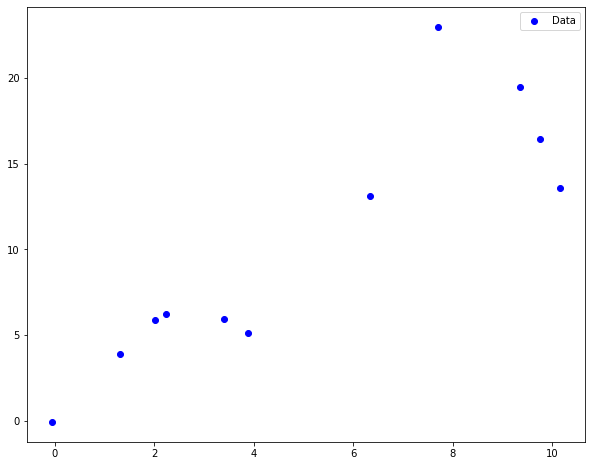

In [7]:
# generate data
x_min, x_max, x_steps = [0,10,11]

X = np.linspace(x_min,x_max,x_steps) + np.random.normal(0,(x_max-x_min)/x_steps,x_steps)
Y = X*np.sin(X) + 2*X

plt.figure(figsize=(10,8))
plt.scatter(X,Y,c="blue",label="Data")
plt.legend()

# Calculate GP

In [8]:
# calculate gp
parameter_l, parameter_sigma = [1,3]

x_pred = np.arange(x_min-0.2*np.abs(x_max-x_min),x_max+0.2*np.abs(x_max-x_min),0.2)
y_pred, y_sigma = generate_gp_pts(x_pred,X,Y,parameter_l,parameter_sigma).T

# plotting the actual function for cross check
X_truth = np.linspace(x_min-0.2*np.abs(x_max-x_min),x_max+0.2*np.abs(x_max-x_min),100)
Y_truth = X_truth*np.sin(X_truth) + 2*X_truth

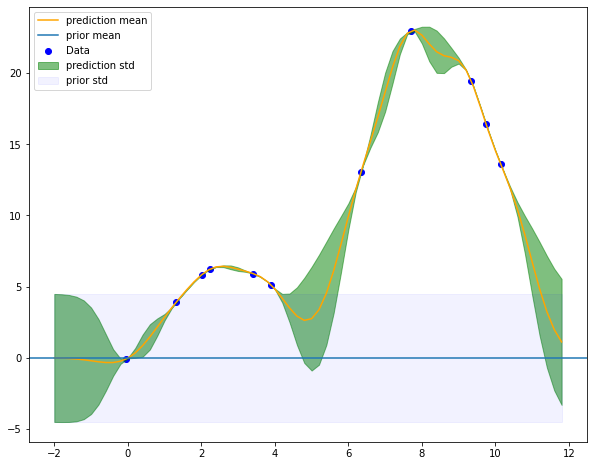

In [10]:
# plot result
plt.figure(figsize=(10,8))

# data
plt.scatter(X,Y,c="blue",label="Data")

# prediction
plt.plot(x_pred,y_pred,c="orange", label="prediction mean")
plt.fill_between(x_pred,
                 y_pred+y_sigma,
                 y_pred-y_sigma,
                 color="green",alpha=0.5,label="prediction std")

# prior
plt.axhline(0,label="prior mean")
plt.fill_between([np.min(x_pred),np.max(x_pred)],
                 0+parameter_sigma**2 /(2*parameter_l**2),
                 0-parameter_sigma**2/(2*parameter_l**2),
                 color="blue",alpha=0.05,label="prior std")

# true function from which the data was sampled
# plt.plot(X_truth,Y_truth,c="red",label="x*sin(x) + 2x")

plt.legend()